In [1]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
#import and load dataset
data = pd.read_csv('moore.csv')
data

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500
...,...,...
156,2017,18000000000
157,2017,19200000000
158,2018,8876000000
159,2018,23600000000


In [8]:
data = pd.read_csv('moore.csv', header=None).to_numpy()
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [9]:
x = data[:,0].reshape(-1,1)
y = data[:,1]

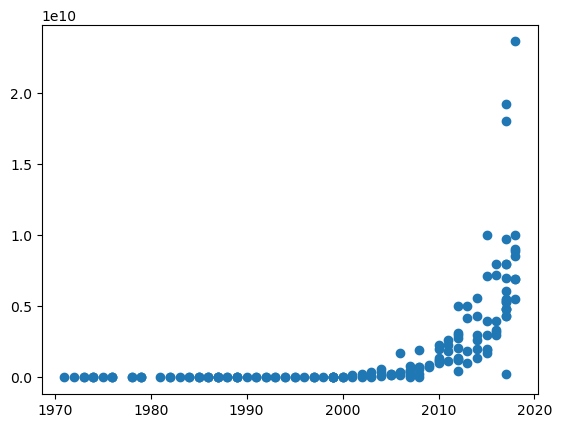

In [10]:
plt.scatter(x,y)

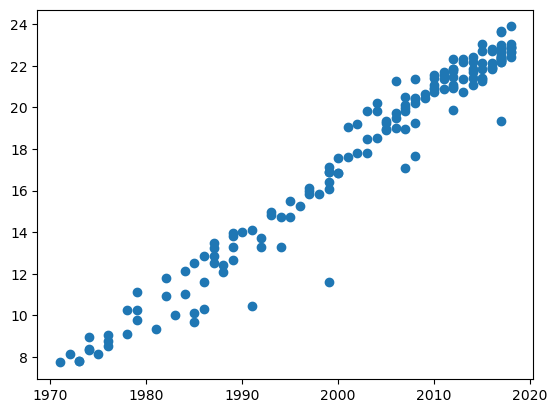

In [11]:
y = np.log(y)
plt.scatter(x,y)

In [12]:
x = x - x.mean()

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)])

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [18]:
def schedule(epoch, lr):
    if epoch>=50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [19]:
r = model.fit(x,y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 742us/step - loss: 320.6870 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 553us/step - loss: 298.0201 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 558us/step - loss: 333.8431 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 587us/step - loss: 308.9078 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 647us/step - loss: 195.2426 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 543us/step - loss: 137.1253 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 612us/step - loss: 129.2772 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 563us/step - loss: 115.1615 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 557us/step - loss: 111.4549 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 595us/step - loss: 65.4826 - lr: 0.0010
Epoch 11/200
6/6 [==============================] 

2023-02-22 20:43:05.826933: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 600us/step - loss: 6.5972 - lr: 0.0010
Epoch 17/200
6/6 [==============================] - 0s 542us/step - loss: 5.2454 - lr: 0.0010
Epoch 18/200
6/6 [==============================] - 0s 520us/step - loss: 4.9697 - lr: 0.0010
Epoch 19/200
6/6 [==============================] - 0s 536us/step - loss: 3.4586 - lr: 0.0010
Epoch 20/200
6/6 [==============================] - 0s 533us/step - loss: 2.4671 - lr: 0.0010
Epoch 21/200
6/6 [==============================] - 0s 560us/step - loss: 2.2158 - lr: 0.0010
Epoch 22/200
6/6 [==============================] - 0s 515us/step - loss: 2.4557 - lr: 0.0010
Epoch 23/200
6/6 [==============================] - 0s 544us/step - loss: 1.8326 - lr: 0.0010
Epoch 24/200
6/6 [==============================] - 0s 545us/step - loss: 1.5034 - lr: 0.0010
Epoch 25/200
6/6 [==============================] - 0s 471us/step - loss: 1.8655 - lr: 0.0010
Epoch 26/200
6/6 [==============================] - 0s 533us/step - loss:

<function matplotlib.pyplot.legend(*args, **kwargs)>

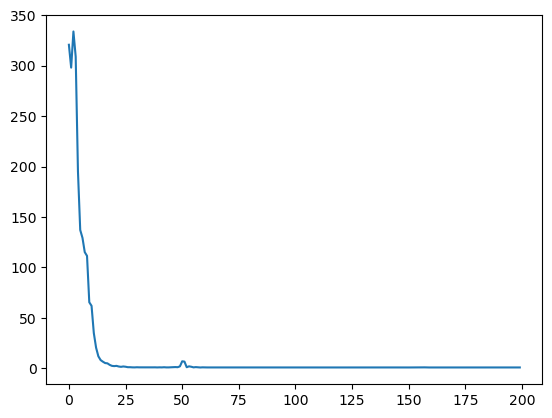

In [20]:
#plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend

In [21]:
model.layers

In [22]:
model.layers[0].get_weights()

[array([[0.3542326]], dtype=float32), array([17.769413], dtype=float32)]

In [23]:
a = model.layers[0].get_weights()[0][0]
a

array([0.3542326], dtype=float32)

In [24]:
print('Time to double:', np.log(2)/a)

Time to double: [1.9567571]


6/6 [==============================] - 0s 599us/step


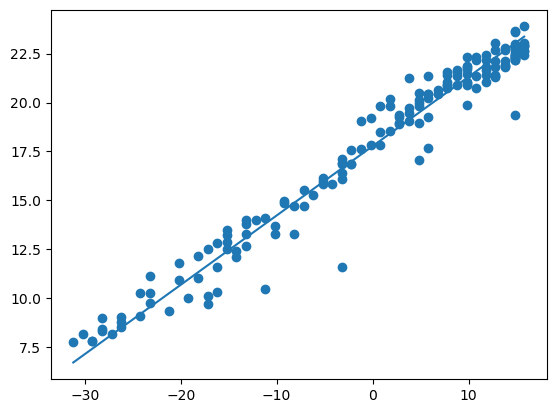

In [25]:
#make predictions
yhat = model.predict(x).flatten()
plt.scatter(x,y)
plt.plot(x, yhat)

In [26]:
w, b = model.layers[0].get_weights()
x = x.reshape(-1,1)
yhat2 = (x.dot(w)+b).flatten()
np.allclose(yhat, yhat2)

True